In [3]:
import numpy as np
import cv2
import matplotlib.pylab as plt

In [4]:
image = cv2.imread("book.jpg")
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
#performing padding
resultSmK3 = np.zeros(shape=(image.shape[0]+2,image.shape[1]+2,3))
resultSmK5 = np.zeros(shape=(image.shape[0],image.shape[1],3))
resultSmK7 = np.zeros(shape=(image.shape[0],image.shape[1],3))
resultShK3 = np.zeros(shape=(image.shape[0],image.shape[1],3))


In [20]:
Blue_channel=image[:,:,0]
Green_channel=image[:,:,1]
Red_channel=image[:,:,2]
#cv2.imshow('blue',Blue_channel)
#cv2.imshow('green',Green_channel)
#cv2.imshow('red',Red_channel)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

(266, 222)
(264, 220)


In [24]:
kernel3=(1/9)*(np.array([[1,1,1],[1,1,1],[1,1,1]]))
kernel5=(1/25)*(np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]]))
kernel7=(1/49)*(np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]]))

In [27]:
#3x3 smoothening kernel
def Convolution(img,kernel):
    
    rk=img.shape[0]
    ck=img.shape[1]
    np.flip(kernel,axis=0)
    np.flip(kernel,axis=1)
    imge=np.pad(img, 1, mode='constant')
    result=np.zeros(shape=(imge.shape[0],imge.shape[1]))
    ri=imge.shape[0]
    ci=imge.shape[1]
    for i in range(ri):
     for j in range(ci):
          if((i>0 and i<ri-1 ) and (j>0 and j<ci-1 )):
            result[i,j]=imge[i,j]*kernel[1,1] + imge[i,j+1]*kernel[1,2]+imge[i,j-1]*kernel[1,0]+imge[i-1,j]*kernel[0,1]+imge[i+1,j]*kernel[2,1]+imge[i-1,j-1]*kernel[0,0]+imge[i-1,j+1]*kernel[0,2]+imge[i+1,j-1]*kernel[2,0]+imge[i+1,j+1]*kernel[2,2]
    return result


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

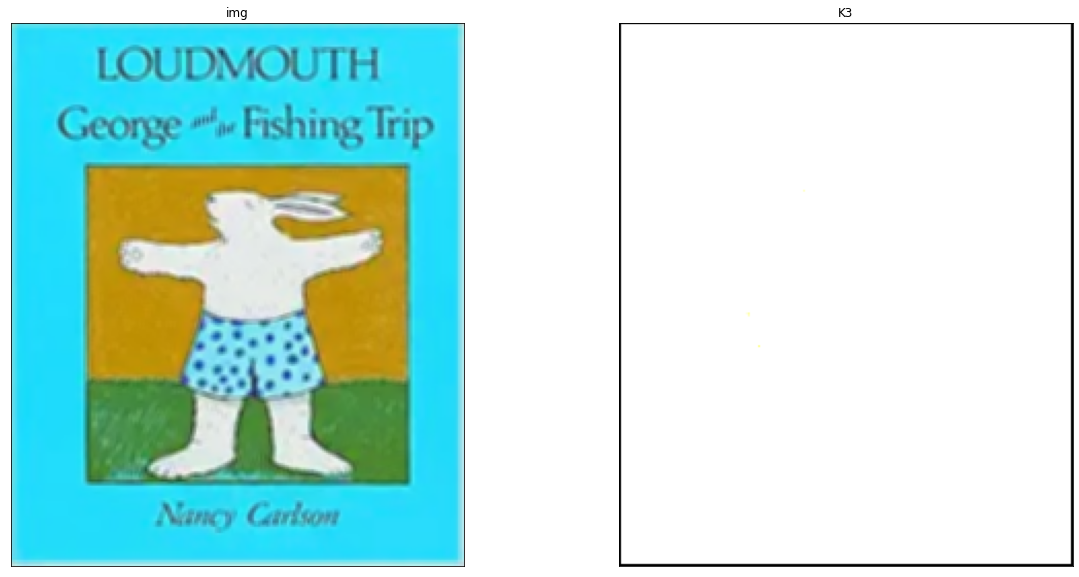

In [28]:
resultSmK3[:,:,0]=Convolution(Blue_channel,kernel3)
resultSmK3[:,:,1]=Convolution(Green_channel,kernel3)
resultSmK3[:,:,2]=Convolution(Red_channel,kernel3)
img = cv2.filter2D(image, -1, kernel3)
cv2.imwrite("Smootheingkernel(3x3)",resultSmK3)
#plt.figure(figsize=(20,10))
#plt.subplot(121)
#plt.imshow(img)
#plt.title('img')
#plt.xticks([])
#plt.yticks([])

#plt.subplot(122)
#plt.imshow(resultSmK3)
#plt.title('K3')
#plt.xticks([])
#plt.yticks([])


#resultSmK5=Convolution(image,kernel5)
#resultSmK7=Convolution(image,kernel7)